In [34]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("../user_data/third_party_data/TLT.csv")
df = df.set_index("Date")
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-30,81.750000,81.900002,81.519997,81.519997,41.799530,6100
2002-07-31,81.949997,82.800003,81.900002,82.529999,42.317417,29400
2002-08-01,82.540001,83.019997,82.540001,83.000000,42.558395,25000
2002-08-02,83.160004,84.099998,82.879997,83.849998,42.994259,52800
2002-08-05,84.040001,84.440002,83.849998,84.220001,43.183964,61100
...,...,...,...,...,...,...
2022-07-08,113.500000,113.500000,112.050003,112.500000,112.500000,15318000
2022-07-11,113.790001,114.790001,113.699997,114.440002,114.440002,13639900
2022-07-12,115.510002,116.230003,114.970001,115.120003,115.120003,18547300


In [36]:
df["Close"].index

Index(['2002-07-30', '2002-07-31', '2002-08-01', '2002-08-02', '2002-08-05',
       '2002-08-06', '2002-08-07', '2002-08-08', '2002-08-09', '2002-08-12',
       ...
       '2022-06-30', '2022-07-01', '2022-07-05', '2022-07-06', '2022-07-07',
       '2022-07-08', '2022-07-11', '2022-07-12', '2022-07-13', '2022-07-14'],
      dtype='object', name='Date', length=5025)

In [37]:
max_idx = argrelextrema(df['Close'].to_numpy(), np.greater, order=100)[0]
min_idx = argrelextrema(df['Close'].to_numpy(), np.less, order=100)[0]

In [38]:
max_idx  # Index numbers of maxima points.

array([  39,  220,  410,  736, 1096, 1420, 1611, 1807, 2037, 2366, 2516,
       3148, 3510, 3804, 4012, 4300, 4535, 4872])

In [39]:
min_idx  # Index numbers of minima points.

array([ 262,  451,  954, 1225, 1479, 1728, 1933, 2150, 2427, 2874, 3250,
       3680, 4096, 4691, 5004])

In [40]:
df.iloc[max_idx]['Close']  # Values of maxima points.

Date
2002-09-24     90.680000
2003-06-13     97.180000
2004-03-16     91.180000
2005-06-30     96.699997
2006-12-04     91.580002
2008-03-20     97.180000
2008-12-19    122.260002
2009-10-01     99.699997
2010-08-31    108.559998
2011-12-19    123.870003
2012-07-25    132.160004
2015-01-30    138.279999
2016-07-08    143.600006
2017-09-07    129.279999
2018-07-06    122.750000
2019-08-28    147.800003
2020-08-04    171.570007
2021-12-03    154.350006
Name: Close, dtype: float64

In [41]:
df.iloc[min_idx]['Close']  # Values of minima points.

Date
2003-08-13     81.250000
2004-05-13     80.650002
2006-05-12     82.650002
2007-06-12     82.349998
2008-06-13     88.870003
2009-06-10     88.190002
2010-04-05     87.470001
2011-02-10     88.190002
2012-03-19    110.099998
2013-12-27    101.809998
2015-06-26    115.230003
2017-03-13    116.510002
2018-11-02    112.000000
2021-03-18    133.919998
2022-06-14    108.809998
Name: Close, dtype: float64

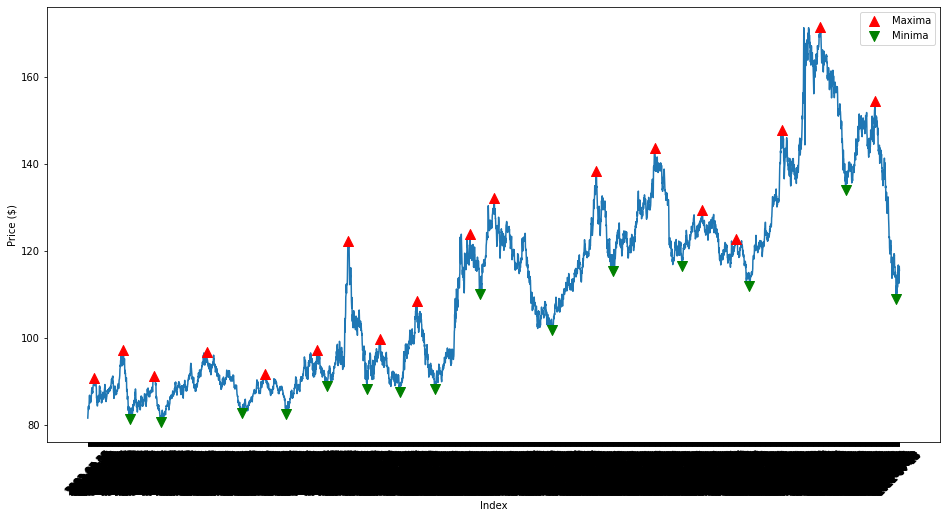

In [42]:
plt.figure(figsize=(16, 8))
plt.plot(df['Close'], zorder=0)
plt.xticks(rotation = 45)
plt.scatter(df.iloc[max_idx].index, df.iloc[max_idx]['Close'],
  label='Maxima', s=100, color="r", marker='^')
plt.scatter(df.iloc[min_idx].index, df.iloc[min_idx]['Close'],
  label='Minima', s=100, color="g", marker='v')

plt.xlabel("Index")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

# Plot the maxima and minima points.

In [44]:
df["maxima"] = df.iloc[max_idx[-1]]['Close']
df

,Open,High,Low,Close,Adj Close,Volume,maxima
Date,,,,,,,
2002-07-30,81.750000,81.900002,81.519997,81.519997,41.799530,6100,154.350006
2002-07-31,81.949997,82.800003,81.900002,82.529999,42.317417,29400,154.350006
2002-08-01,82.540001,83.019997,82.540001,83.000000,42.558395,25000,154.350006
2002-08-02,83.160004,84.099998,82.879997,83.849998,42.994259,52800,154.350006
2002-08-05,84.040001,84.440002,83.849998,84.220001,43.183964,61100,154.350006
...,...,...,...,...,...,...,...
2022-07-08,113.500000,113.500000,112.050003,112.500000,112.500000,15318000,154.350006
2022-07-11,113.790001,114.790001,113.699997,114.440002,114.440002,13639900,154.350006
2022-07-12,115.510002,116.230003,114.970001,115.120003,115.120003,18547300,154.350006
